In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, average_precision_score, \
    confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier

from src.datamanager import DataManager
from src.studymanager import StudyManager, Optimizer, Param

In [28]:
%load_ext autoreload
%autoreload 2

In [29]:
data_filepath = './data/sepsis_updated_data_Feb21-Sep23.csv'
y_label = 'bc_positive_or_diagnosis_or_cause_of_death'
seed = 2024
n_trials = 64
columns_of_interest = ['Apgar1', 'Apgar5', 'Age', 'Gender',
       'Satsair', 'Typebirth', 'Romlength', 
       'Gestation', 'Birthweight', 'Temperature', 'Skin',
       'Dangersigns', 'Signsrd', 'Wob', 'Activity', 'Umbilicus', 'Colour',
       'Rr', 'Vomiting', 'Abdomen', 'Fontanelle', 'Hr']

In [30]:
study_managers = []

for reduce_cardinality in [True, False]:
    lr_study_manager = StudyManager('lr', y_label, data_filepath, columns_of_interest, seed, n_trials, LogisticRegression, None, {'penalty': None, 'max_iter': 10000}, reduce_cardinality=reduce_cardinality)
    lr_study_manager.run()
    lr_study_manager.enhance()
    study_managers.append(lr_study_manager)
    
    lgb_study_manager = StudyManager('lgb', y_label, data_filepath, columns_of_interest, seed, n_trials, LGBMClassifier, [
        Param('n_estimators', 'suggest_int', (100, 1000, 100)),
        Param('max_depth', 'suggest_int', (3, 10)),
        # Param('min_data_in_leaf', 'suggest_int', (20, 100, 10)),
        # Param('bagging_fraction', 'suggest_float', (0.5, 1.0)),
        # Param('feature_fraction', 'suggest_float', (0.5, 1.0)),
        Param('reg_alpha', 'suggest_float', (0, 1)),
        Param('reg_lambda', 'suggest_float', (0, 1)),
        Param('min_split_gain', 'suggest_float', (0, 1)),
        Param('colsample_bytree', 'suggest_float', (0.3, 1.0)),
        Param('learning_rate', 'suggest_float', (0.01, 0.3), kwargs={'log': True}),
        Param('num_leaves', 'suggest_int', (8, 128), kwargs={'step': 2})
    ], {'objective': 'binary'}, scale=True, dummies=True, reduce_cardinality=reduce_cardinality)
    lgb_study_manager.run()
    lgb_study_manager.enhance()
    study_managers.append(lgb_study_manager)


[0.06666867 0.10119752 0.06670079]
Best_clf fitted:LogisticRegression(max_iter=10000, penalty=None)
Test set performance..:
0.6651432694909648


[I 2024-01-25 21:47:22,527] A new study created in memory with name: no-name-587b895e-b8cf-4ca1-891d-dfbd6752ebba
[I 2024-01-25 21:47:23,458] Trial 0 finished with value: 0.08803648066489167 and parameters: {'n_estimators': 100, 'max_depth': 6, 'reg_alpha': 0.45403478456597535, 'reg_lambda': 0.8601585543647268, 'min_split_gain': 0.2780697398424188, 'colsample_bytree': 0.5060794029879991, 'learning_rate': 0.01864142580352665, 'num_leaves': 88}. Best is trial 0 with value: 0.08803648066489167.
[I 2024-01-25 21:47:24,012] Trial 1 finished with value: 0.07285291350420729 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'reg_alpha': 0.457895547880959, 'reg_lambda': 0.8579694871231441, 'min_split_gain': 0.3251621985444185, 'colsample_bytree': 0.9417511779806935, 'learning_rate': 0.017507579109420468, 'num_leaves': 114}. Best is trial 0 with value: 0.08803648066489167.
[I 2024-01-25 21:47:24,133] Trial 2 finished with value: 0.0886349925116852 and parameters: {'n_estimators': 100, 'max_

[0.085842  0.080354  0.0985141]
Best_clf fitted:LGBMClassifier(colsample_bytree=0.6757250463930906,
               learning_rate=0.03809677031389407, max_depth=3,
               min_split_gain=0.46435911827316123, num_leaves=94,
               objective='binary', reg_alpha=0.3339099358365242,
               reg_lambda=0.7255270248101541)
Test set performance..:
0.758093047495916
[0.07102774 0.10205553 0.06211594]
Best_clf fitted:LogisticRegression(max_iter=10000, penalty=None)
Test set performance..:
0.623811098750213


[I 2024-01-25 21:49:58,328] A new study created in memory with name: no-name-7aeaa2f9-f9b6-4e27-8b62-40d325390374
[I 2024-01-25 21:49:59,121] Trial 0 finished with value: 0.08009516084783488 and parameters: {'n_estimators': 500, 'max_depth': 7, 'reg_alpha': 0.370602176688284, 'reg_lambda': 0.3128681180263736, 'min_split_gain': 0.7343351032762525, 'colsample_bytree': 0.5537522893042066, 'learning_rate': 0.020271308934198703, 'num_leaves': 26}. Best is trial 0 with value: 0.08009516084783488.
[I 2024-01-25 21:49:59,598] Trial 1 finished with value: 0.07979990904088868 and parameters: {'n_estimators': 800, 'max_depth': 8, 'reg_alpha': 0.807146789832629, 'reg_lambda': 0.9642136992897923, 'min_split_gain': 0.8286630879622314, 'colsample_bytree': 0.5641769276069312, 'learning_rate': 0.07178203173398913, 'num_leaves': 28}. Best is trial 0 with value: 0.08009516084783488.
[I 2024-01-25 21:49:59,967] Trial 2 finished with value: 0.08952962735378989 and parameters: {'n_estimators': 700, 'max_dep

[0.0747396  0.07334841 0.10472318]
Best_clf fitted:LGBMClassifier(colsample_bytree=0.7197070544089373,
               learning_rate=0.2246447791399722, max_depth=3,
               min_split_gain=0.8258018678885498, n_estimators=500,
               num_leaves=118, objective='binary', reg_alpha=0.6110752578964982,
               reg_lambda=0.9265037274310387)
Test set performance..:
0.7510172685087746


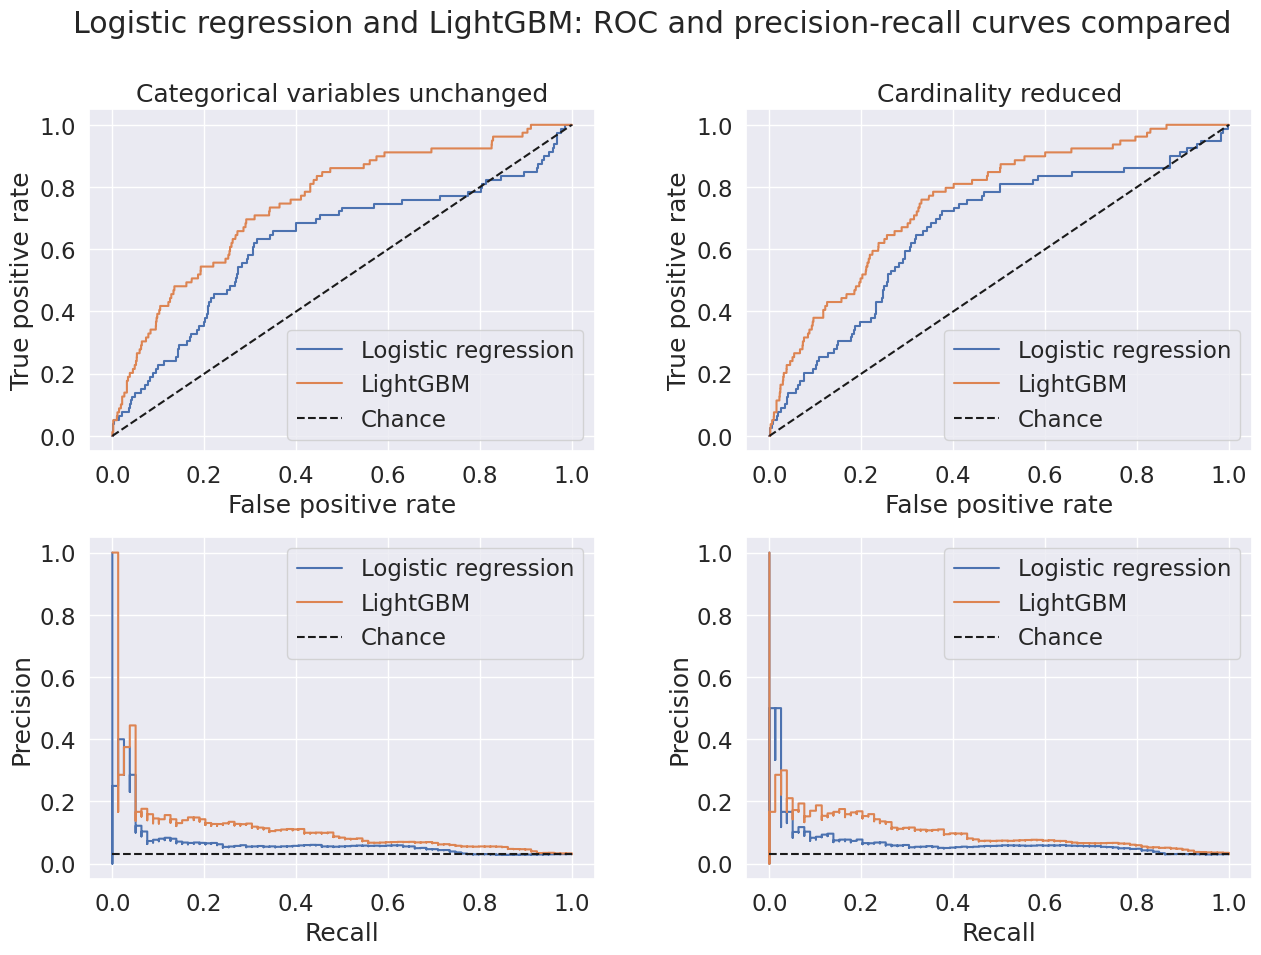

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for idx, sm in enumerate(study_managers):
    if sm.reduce_cardinality:
        y = 1
    else: 
        y = 0
    x = 0
    ax = axes[x, y]
    if sm.name == 'lgb':
        RocCurveDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=ax, label='LightGBM', plot_chance_level=True, chance_level_kw={'label':'Chance'})
    else:
        RocCurveDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=ax, label='Logistic regression')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.legend(loc='lower right')
    axis_title = 'Cardinality reduced' if sm.reduce_cardinality else 'Categorical variables unchanged'
    ax.set_title(axis_title)
    # ax.label_outer()
    x = 1
    ax = axes[x, y]
    if sm.name == 'lgb':
        PrecisionRecallDisplay.from_predictions(
            sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=ax, label='LightGBM', plot_chance_level=True, chance_level_kw={'label':'Chance'}
        )
    else:
        PrecisionRecallDisplay.from_predictions(
            sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=ax, label='Logistic regression'
        )
        
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc='upper right')
    # ax.set_title(sm.reduce_cardinality)
    # ax.label_outer()
plt.subplots_adjust(hspace=0.25, wspace=0.3)
fig.suptitle('Logistic regression and LightGBM: ROC and precision-recall curves compared')
plt.savefig('lr_lgb_compared_v7.png', pad_inches=0.0)

In [32]:
for idx, sm in enumerate(study_managers):
    print(sm.name, sm.reduce_cardinality)
    print(f'{roc_auc_score(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1]):.3f}')
    print(f'{average_precision_score(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1]):.3f}')

lr True
0.665
0.071
lgb True
0.758
0.100
lr False
0.624
0.067
lgb False
0.751
0.112


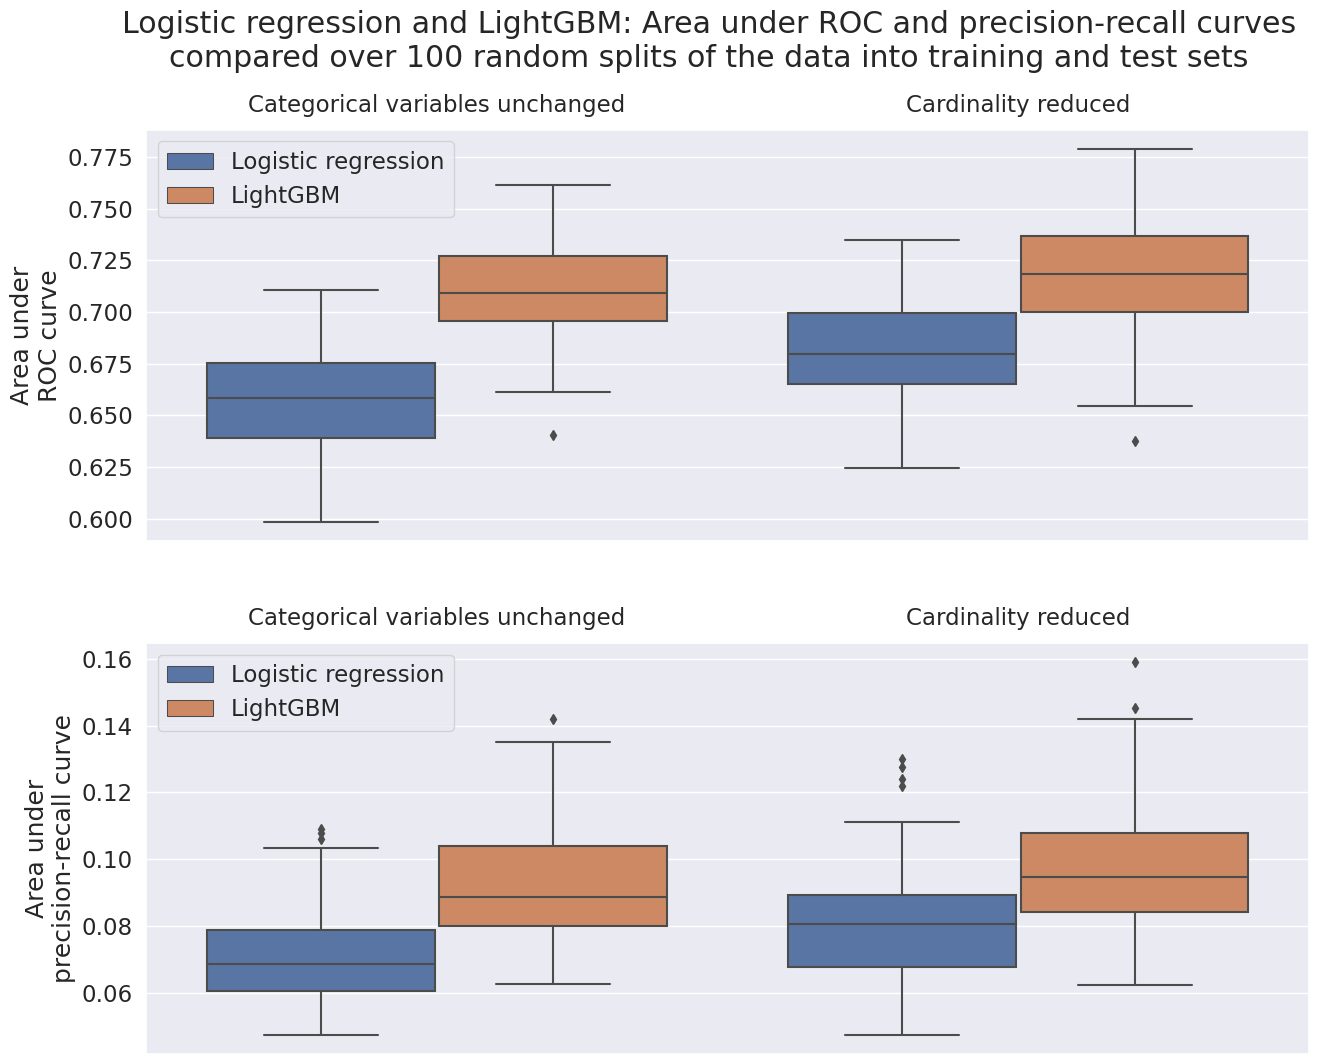

In [38]:
seed_shuffle_df = pd.concat([pd.DataFrame(sm.seed_shuffle_rows) for sm in study_managers])
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
seed_shuffle_df['Model type'] = seed_shuffle_df['name'].apply(
    lambda x: 'LightGBM' if x == 'lgb' else 'Logistic regression'
)
seed_shuffle_df['reduce_cardinality'] = pd.Categorical(seed_shuffle_df['reduce_cardinality'].apply(
    lambda x: 'Cardinality reduced' if x else 'Categorical variables unchanged'
), categories=['Categorical variables unchanged', 'Cardinality reduced'])
for idx, metric in enumerate(['test_set_auroc', 'test_set_auprc']):   
    ax = axes[idx]
    sns.boxplot(seed_shuffle_df, hue='Model type', x='reduce_cardinality', y=metric, ax=ax)
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', top=False)
    ax.set_xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)
    ylabel = 'Area under\nROC curve' if metric == 'test_set_auroc' else 'Area under\nprecision-recall curve'
    ax.set_ylabel(ylabel)
        
plt.subplots_adjust(hspace=0.25, wspace=0.3)
fig.suptitle('Logistic regression and LightGBM: Area under ROC and precision-recall curves\ncompared over 100 random splits of the data into training and test sets')
plt.savefig('lr_lgb_compared_boxplot_v3.png', pad_inches=0.0)

In [34]:
study_managers_full = []

for reduce_cardinality in [True, False]:    
    lgb_study_manager = StudyManager('lgb', y_label, data_filepath, columns_of_interest, seed, n_trials, LGBMClassifier, [
        Param('n_estimators', 'suggest_int', (100, 1000, 100)),
        Param('max_depth', 'suggest_int', (3, 10)),
        # Param('min_data_in_leaf', 'suggest_int', (20, 100, 10)),
        # Param('bagging_fraction', 'suggest_float', (0.5, 1.0)),
        # Param('feature_fraction', 'suggest_float', (0.5, 1.0)),
        Param('reg_alpha', 'suggest_float', (0, 1)),
        Param('reg_lambda', 'suggest_float', (0, 1)),
        Param('min_split_gain', 'suggest_float', (0, 1)),
        Param('colsample_bytree', 'suggest_float', (0.3, 1.0)),
        Param('learning_rate', 'suggest_float', (0.01, 0.3), kwargs={'log': True}),
        Param('num_leaves', 'suggest_int', (8, 128), kwargs={'step': 2})
    ], {'objective': 'binary'}, scale=False, dummies=False, reduce_cardinality=reduce_cardinality)
    lgb_study_manager.run()
    lgb_study_manager.enhance()
    study_managers_full.append(lgb_study_manager)

/hpchome/ccaeelo@IDHS.UCL.AC.UK/projects/neotree-report/src/datamanager.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested_but_age_is_na = (~pd.isna(row['Neolab_finalbcresult'])) & (pd.isna(row['age_at_test']))
[I 2024-01-25 21:50:47,538] A new study created in memory with name: no-name-37b45d64-5ee3-4c3b-ba59-2c30555c3453
[I 2024-01-25 21:50:48,182] Trial 0 finished with value: 0.08132027298888594 and parameters: {'n_estimators': 900, 'max_depth': 8, 'reg_alpha': 0.9802396557555663, 'reg_lambda': 0.8312012619352391, 'min_split_gain': 0.2721366173541976, 'colsample_bytree': 0.886398956568359, 'learning_rate': 0.01431599235464198, 'num_leaves': 50}. Best is trial 0 with value: 0.08132027298888594.
[I 2024-01-25 21:50:48,581] Trial 1 fini

[0.07836676 0.07774537 0.11185678]
Best_clf fitted:LGBMClassifier(colsample_bytree=0.3999894839313358,
               learning_rate=0.013074202376844007, max_depth=3,
               min_split_gain=0.34236933350450804, n_estimators=400,
               num_leaves=66, objective='binary', reg_alpha=0.9606986651120272,
               reg_lambda=0.7030305483433242)
Test set performance..:
0.6751978793309438


/hpchome/ccaeelo@IDHS.UCL.AC.UK/projects/neotree-report/src/datamanager.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested_but_age_is_na = (~pd.isna(row['Neolab_finalbcresult'])) & (pd.isna(row['age_at_test']))
/hpchome/ccaeelo@IDHS.UCL.AC.UK/projects/neotree-report/src/datamanager.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested_but_age_is_na = (~pd.isna(row['Neolab_finalbcresult'])) & (pd.isna(row['age_at_test']))
/hpchome/ccaeelo@IDHS.UCL.AC.UK/projects/neotree-report/src/datamanage

[0.07327197 0.07205088 0.10545607]
Best_clf fitted:LGBMClassifier(colsample_bytree=0.8743232131105858,
               learning_rate=0.014086341508324343, max_depth=4,
               min_split_gain=0.9153258927072488, n_estimators=900,
               num_leaves=98, objective='binary', reg_alpha=0.5092317909297195,
               reg_lambda=0.9172324092799333)
Test set performance..:
0.664803614097969


/hpchome/ccaeelo@IDHS.UCL.AC.UK/projects/neotree-report/src/datamanager.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested_but_age_is_na = (~pd.isna(row['Neolab_finalbcresult'])) & (pd.isna(row['age_at_test']))
/hpchome/ccaeelo@IDHS.UCL.AC.UK/projects/neotree-report/src/datamanager.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested_but_age_is_na = (~pd.isna(row['Neolab_finalbcresult'])) & (pd.isna(row['age_at_test']))
/hpchome/ccaeelo@IDHS.UCL.AC.UK/projects/neotree-report/src/datamanage

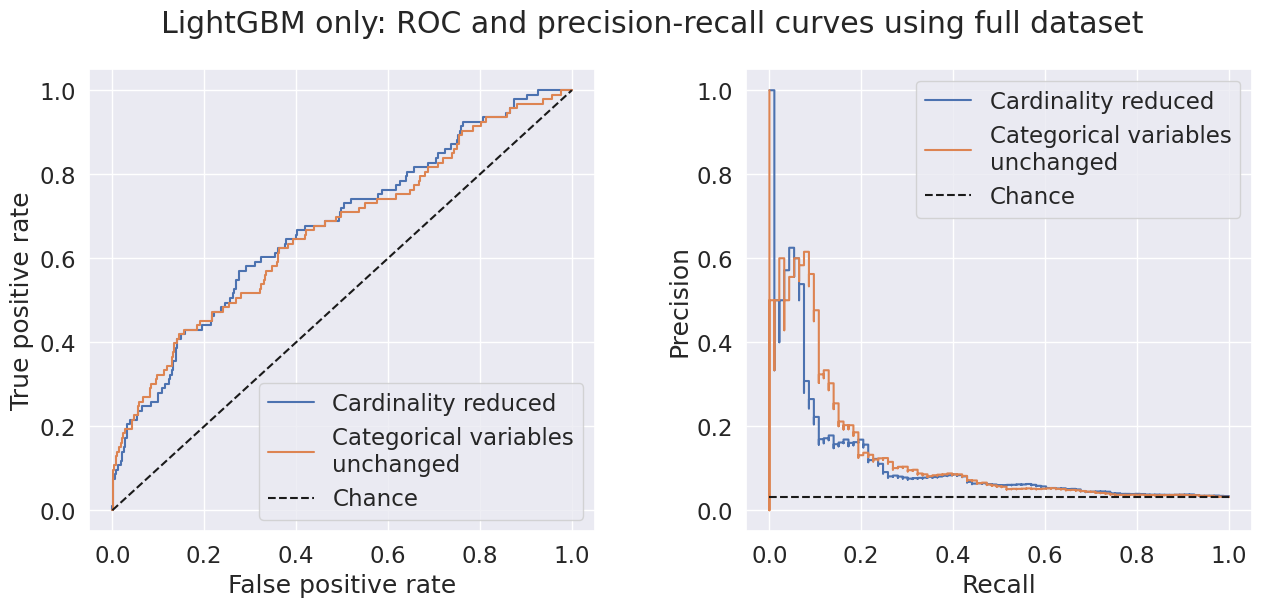

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
for sm in study_managers_full:
    if sm.reduce_cardinality:
        RocCurveDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=axes[0], label='Cardinality reduced')
        PrecisionRecallDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=axes[1], label='Cardinality reduced')
    else:
        RocCurveDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=axes[0], label='Categorical variables\nunchanged', plot_chance_level=True, chance_level_kw={'label':'Chance'})
        PrecisionRecallDisplay.from_predictions(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1], ax=axes[1], label='Categorical variables\nunchanged', plot_chance_level=True, chance_level_kw={'label':'Chance'})
axes[0].set_xlabel('False positive rate')
axes[0].set_ylabel('True positive rate')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[0].legend(loc='lower right')
axes[1].legend(loc='upper right')
plt.subplots_adjust(hspace=0.25, wspace=0.3)
fig.suptitle('LightGBM only: ROC and precision-recall curves using full dataset')
plt.savefig('lgb_only_v3.png', pad_inches=0.0)

In [36]:
for idx, sm in enumerate(study_managers_full):
    print(sm.name, sm.reduce_cardinality)
    print(f'{roc_auc_score(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1]):.3f}')
    print(f'{average_precision_score(sm.y_test, sm.best_clf.predict_proba(sm.X_test)[:,1]):.3f}')

lgb True
0.675
0.118
lgb False
0.665
0.130


Taking the model which was trained on the full dataset, without simplification of categorical variables, to be our top-performing model, we are able to obtain the following performance metrics:

In [42]:
top_sm = study_managers_full[1]
assert top_sm.name == 'lgb' and not top_sm.reduce_cardinality

In [51]:
fpr, tpr, thresholds = roc_curve(top_sm.y_test, top_sm.best_clf.predict_proba(sm.X_test)[:,1])
thresholds_df = pd.DataFrame({
    'sensitivity': tpr,
    'specificity': 1 - fpr,
    'threshold': thresholds
})
thresholds_df.loc[thresholds_df['sensitivity'] >= 0.9].head(1)

,sensitivity,specificity,threshold
155,0.903226,0.238194,0.009842


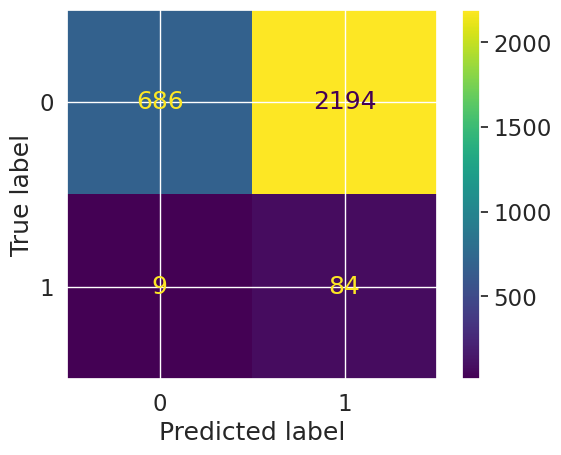

In [62]:
threshold = 0.009842
disp = ConfusionMatrixDisplay(confusion_matrix(top_sm.y_test, top_sm.best_clf.predict_proba(sm.X_test)[:,1] > threshold))
disp.plot();

To estimate the number of neonates that would be treated unnecessarily in an average year, we assume that 2022 was an average year in terms of admission statistics (the other two years in the data were incomplete):

In [63]:
annual_count_df = data_manager.df[['Uid', 'Datetimeadmission']].copy()
annual_count_df['year'] = annual_count_df['Datetimeadmission'].dt.year
annual_count_df.drop_duplicates(inplace=True)
annual_count_df['year'].value_counts()

2022    4519
2023    3874
2021    3497
Name: year, dtype: int64

We scale the total number of false positives by this value divided by the total number of cases in the data:

In [64]:
(4519 / 11890) * 2194

833.8676198486123

Analagously, to find the number of false negatives in an average year:

In [65]:
(4519 / 11890) * 9

3.4206055508830953